In [435]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [436]:
mouse_merge.rpow

<bound method _arith_method_FRAME.<locals>.f of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

   

In [437]:
# Checking the number of mice.
mice_count = len(mouse_merge["Mouse ID"].unique())
print(mice_count)

249


In [438]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
x = np.array(mouse_merge["Mouse ID"].value_counts())
print(mouse_merge["Mouse ID"].mode())

0    g989
dtype: object


In [439]:
y = len(mouse_merge.duplicated(subset=["Mouse ID", "Timepoint"]).value_counts())
print(y)

2


In [440]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = mouse_merge.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [441]:
df.rpow

<bound method _arith_method_FRAME.<locals>.f of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

   

In [442]:
mice_counter = len(df["Mouse ID"].unique())
print(mice_counter)

249


In [443]:
# Summary statistics

In [444]:
describe_df = mouse_merge.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].describe()
describe_df.head()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817

In [445]:
# Bar and Pie Charts

In [457]:
# Create an array that contains the number of users each language has
users = describe_df[[('Tumor Volume (mm3)', 'count')]]
#users = describe_df.sort_values(('Tumor Volume (mm3)', 'count'), ascending=False)

#x_axis = np.arange((users))
users.head()
#describe_df.columns

,Tumor Volume (mm3)
,count
Drug Regimen,
Capomulin,230.0
Ceftamin,178.0
Infubinol,178.0
Ketapril,188.0
Naftisol,186.0


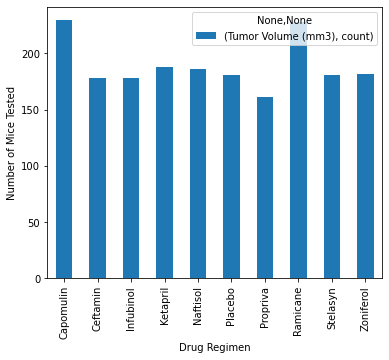

<Figure size 432x288 with 0 Axes>

In [458]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a bar chart based off of the group series from before


figure_1 = users.plot(kind='bar', figsize=(6,5))

# Set the xlabel and ylabel using class methods
figure_1.set_xlabel("Drug Regimen")
figure_1.set_ylabel("Number of Mice Tested")

# Configure x-tck rotation
#xticklabels = figure_1.index
#figure_1.set_xticklabels(, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()
plt.tight_layout()

In [448]:
col_list = list(describe_df["Tumor Volume (mm3)", "count"])
print(col_list)

col_lists = list(describe_df.index)
print(col_lists)

[230.0, 178.0, 178.0, 188.0, 186.0, 181.0, 161.0, 228.0, 181.0, 182.0]
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


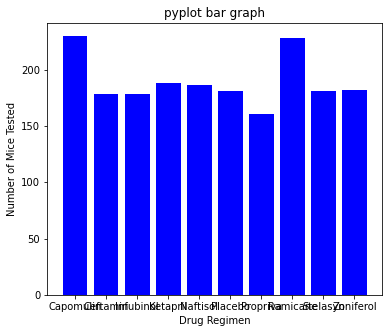

<Figure size 432x288 with 0 Axes>

In [449]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
X = list(col_lists) 
Y = list(col_list) 

fig = plt.figure(figsize =(6, 5))
  
# Plot the data using bar() method 
plt.bar(X, Y, color='b') 
plt.title("pyplot bar graph") 
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Mice Tested") 
  
# Show the plot 
plt.show() 
plt.tight_layout()

In [450]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [451]:
sex_headers = df["Sex"].value_counts()
print(sex_headers)

Male      958
Female    925
Name: Sex, dtype: int64


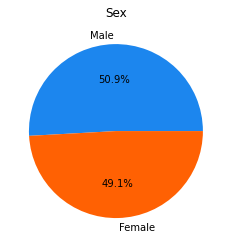

In [452]:
sex_data = sex_headers
label_py = ["Male", "Female"]
colors = ["#1C86EE", "#FF6103"]
plt.pie(sex_data, labels=label_py, colors=colors, autopct='%1.1f%%')
plt.title("Sex") 
plt.show()

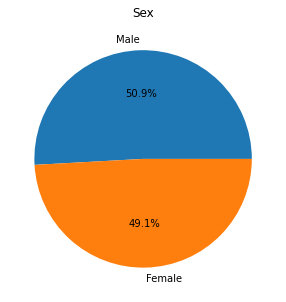

In [453]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
labels = ["Male", "Female"]
plt.pie(sex_headers, labels=labels, startangle=0, autopct='%.1f%%')
plt.title('Sex')
plt.show()

In [507]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol_data = []
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = df[df["Timepoint"] == 45]
greatest_timepoint_df.head(10)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
1768,b559,45,73.051363,1,Naftisol,Male,20,26
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1770,c282,45,65.815165,2,Placebo,Male,12,27
1771,l509,45,41.483008,3,Capomulin,Male,17,21
1772,j296,45,61.849023,3,Ceftamin,Female,24,30


In [550]:
total_greatest_df = greatest_timepoint_df[greatest_timepoint_df["Drug Regimen"] == treatments]
total_greatest_df.head()

In [579]:
#timepoint_max = greatest_timepoint_df[["Tumor Volume (mm3)", "Drug Regimen"]]
#print(timepoint_max.query("@treatments"))

Cap_df = greatest_timepoint_df[greatest_timepoint_df["Drug Regimen"].str.startswith('Capomulin')]
Cap_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1771,l509,45,41.483008,3,Capomulin,Male,17,21
1777,g288,45,37.074024,1,Capomulin,Male,3,19
1788,r554,45,32.377357,3,Capomulin,Female,8,17
1791,g316,45,40.159220,2,Capomulin,Female,22,22
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1800,m957,45,33.329098,1,Capomulin,Female,3,19
1817,l897,45,38.846876,1,Capomulin,Male,17,19
1821,v923,45,40.658124,2,Capomulin,Female,19,21


In [547]:
Ram_df = greatest_timepoint_df[greatest_timepoint_df['Drug Regimen'].str.startswith('Ramicane')]
#Ram_df.head(100)

In [546]:
Inf_df = greatest_timepoint_df[greatest_timepoint_df['Drug Regimen'].str.startswith('Infubinol')]
#Inf_df.head(100)

In [545]:
Ceft_df = greatest_timepoint_df[greatest_timepoint_df['Drug Regimen'].str.startswith('Ceftamin')]
#Ceft_df.head(100)

In [575]:
grouped_collective_timepoint_df = Cap_df.merge(Ram_df,how ='left').merge(Inf_df,how ='left').merge(Ceft_df,how ='left')
#grouped_collective_timepoint_df.tail(100)
#print(grouped_collective_timepoint_df)

In [595]:
Cap1_df = df[df["Drug Regimen"].str.startswith('Capomulin')]
Cap1_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
874,s710,15,41.845235,0,Capomulin,Female,1,23
881,l509,15,47.488599,1,Capomulin,Male,17,21
895,f966,15,32.623003,0,Capomulin,Male,16,17
913,v923,15,40.457989,0,Capomulin,Female,19,21


In [554]:
# Put treatments into a list for for loop (and later for plot labels)
# my for loops, and treatments [], wouldn't work 

total_quartiles = greatest_timepoint_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Cap_quartiles = Cap_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ram_quartiles = Ram_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Inf_quartiles = Inf_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ceft_quartiles = Ceft_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = total_quartiles[0.25]
upperq = total_quartiles[0.75]
lowerq_cap = Cap_quartiles[0.25]
upperq_cap = Cap_quartiles[0.75]
lowerq_Ram = Ram_quartiles[0.25]
upperq_Ram = Ram_quartiles[0.75]
lowerq_Inf = Inf_quartiles[0.25]
upperq_Inf = Inf_quartiles[0.75]
lowerq_ceft = Ceft_quartiles[0.25]
upperq_ceft = Ceft_quartiles[0.75]
iqr = upperq-lowerq

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#IQR of Cap/ quantitatively
iqr_Cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_Cap)
upper_bound_cap = upperq_cap + (1.5*iqr_Cap)

#IQR of Ram_df
iqr_Ram = upperq_Ram-lowerq_Ram
lower_bound_Ram = lowerq_Ram - (1.5*iqr_Ram)
upper_bound_Ram = upperq_Ram + (1.5*iqr_Ram)
#IQR of Inf
iqr_Inf = upperq_Inf-lowerq_Inf
lower_bound_Inf = lowerq_Inf - (1.5*iqr_Inf)
upper_bound_Inf = upperq_Inf + (1.5*iqr_Inf)
#IQR of Ceft
iqr_ceft = upperq_ceft-lowerq_ceft 
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft) 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
print(f"Capomulin's potential outliers: {lower_bound_cap} {upper_bound_cap}")
print(f"Ramicane's potential outliers: {lower_bound_Ram} {upper_bound_Ram}")
print(f"Infubinol's potential outliers: {lower_bound_Inf} {upper_bound_Inf}")
print(f"Ceftamin's potential outliers: {lower_bound_ceft} {upper_bound_ceft}")

Capomulin's potential outliers: 20.70456164999999 51.83201549
Ramicane's potential outliers: 19.690480101250003 49.79900043124999
Infubinol's potential outliers: 55.35777559500001 75.08224443499999
Ceftamin's potential outliers: 52.29350701999999 76.66786758


TypeError: unsupported operand type(s) for /: 'str' and 'int'

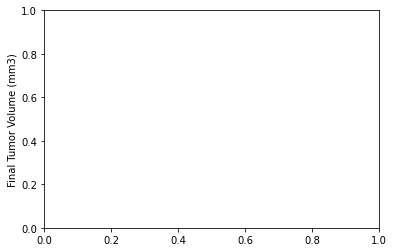

In [580]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
times = greatest_timepoint_df["Drug Regimen"]
fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Tennis Batting Cage')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(times)
plt.show()

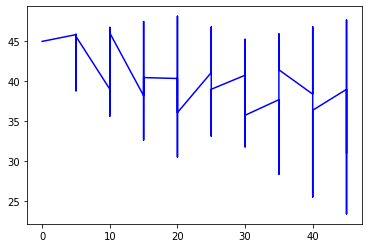

In [592]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = plt.plot(Cap1_df["Timepoint"], Cap1_df['Tumor Volume (mm3)'], color="blue")
                                                     

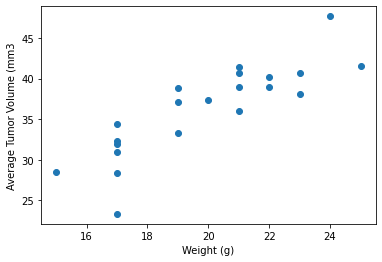

In [582]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Tumor_vol = Cap_df['Tumor Volume (mm3)']
Weight = Cap_df['Weight (g)']
plt.scatter(Weight,Tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between the mouse weight and the average tumor volume is : 0.720923104644634


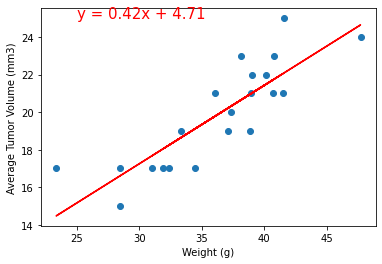

In [586]:
x_values = Cap_df['Tumor Volume (mm3)']
y_values = Cap_df['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between the mouse weight and the average tumor volume is : {rvalue**2}")
plt.show()